# 가우시안 혼합 모델 실습



> 장점: 다양한 분야에 적용할 수 있음

> 단점: n_components(클러스터 개수)정해주어야 함, 지역 최적화(local optimization-국지적 적합) 문제, EM 알고리즘의 로그가능도 함수의 값 수렴속도 느림



---

평가는 군집 모델 성능 평가에 쓰이는 실루엣 스코어를 사용한다.

##### 11.5.3 임의로 데이터를 생성하여 클러스터링 해보는 실습.

# Data generating
## 임의 데이터 생성

In [18]:
from sklearn.datasets import make_blobs  # 임의 뭉치 데이터 생성

X, y = make_blobs(n_samples = 200,       # 200개, 2개 피처, 2개 센터
                  n_features = 2,
                  centers = 2, 
                  random_state = 2)

## 생성된 데이터 차원 확인

In [19]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


피처 데이터는 2차원 데이터 200개가 생성되어있다. 타깃 데이터의 차원은 1차원 데이터가 200개 생성되어있는 상태. (200행 1열)

## unlabeled data plot

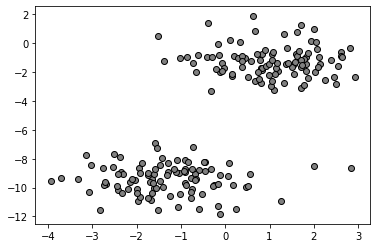

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = 'o')
plt.show()

# Gaussian Mixture
## clustering

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm.fit(X)
label_gmm = gmm.predict(X)

In [25]:
# 각 데이터 포인트가 어디에 속하게 되었는지 확인

label_gmm

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

## to data frame

In [26]:
# 시각화를 위해 데이터 프레임으로 만들어준다
import pandas as pd

gmm_columns = ['gmm_comp1', 'gmm_comp2']           # 피처 이름 
X_gmm_df = pd.DataFrame(X, columns = gmm_columns)  # 데이터 프레임 생성
X_gmm_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_gmm_df['label_gmm'] = label_gmm                  # 클러스터링하여 정해진 라벨을 열에 추가
X_gmm_df.head(5)

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


In [28]:
# 타깃 데이터의 이름 checking : 0, 1 
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print(set(X_gmm_df['target']))

# dbs 군집의 이름을 확인
print(set(X_gmm_df['label_gmm']))

{0, 1}
{0, 1}


각각 0과 1로 라벨링이 되어있다. 구분한다는 의미에서는 차이가 없기 때문에 순서나 0,1 수 자체는 상관 없다.

## 가우시안 혼합 모형 클러스터링 결과 시각화: 데이터 플롯

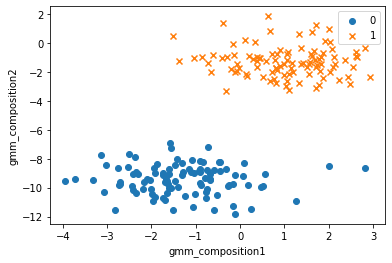

In [30]:
df = X_gmm_df
markers = ['o', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 2개 클러스터로 2개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_gmm'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['gmm_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('gmm_composition1')
plt.ylabel('gmm_composition2')
plt.legend()
plt.show()

## 실제 타깃 플롯

실제 타깃 데이터(정답 데이터)를 이용한 플롯을 확인한다.

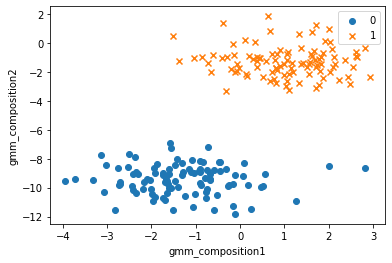

In [32]:
df = X_gmm_df
markers = ['o', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 2개 클러스터로 2개 마커 각각 대응되도록 정해준다.
    df_i = df[df['target'] == i]      # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['gmm_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('gmm_composition1')
plt.ylabel('gmm_composition2')
plt.legend()
plt.show()


# 모형 평가

클러스터링 모형 평가는 실루엣 스코어 함수를 사용한다. 

값은 피처 값과 모형을 통해 만들어진 라벨링 값을 넣어준다.

In [33]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.7842908753561848


### Commentary

꽤 정확한 결과인 것으로 보인다.
